## Deliverable 1 - Data Cleaning and Preparation
BANA 785 <br>
Christine Dorward, Adit Shetty, Mind Tienpasertkij

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import re

In [2]:
## Mind's Directory
mydir = "/Users/ptienpasertkij/Documents/RIT/Summer 2021/BANA785/All Data Files/"
## Adit's Directory
## mydir = **INSERT DIRECTORY**
## Christine's Directory
##mydir = "C:/users/chrdo/Downloads/"

customerData = mydir + "Wegmans Customer Data.csv"
itemData = mydir + "Wegmans Item Data.csv"
salesData = mydir + "Wegmans Sales Data.csv"
locationData = mydir + "Wegmans Location Data.csv"
customer = pd.read_csv(customerData)
item = pd.read_csv(itemData)
sales = pd.read_csv(salesData)
location = pd.read_csv(locationData)

### Customer Dataset

In [3]:
customer

,CUSTOMER_ID,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN
0,2767,2767,106.0,100K-125K,0.0
1,4111,4111,58.0,30K-40K,1.0
2,655,655,67.0,NaN,NaN
3,1999,1999,NaN,NaN,NaN
4,1423,1423,79.0,30K-40K,1.0
...,...,...,...,...,...
7043,2065,2065,35.0,<10K,2.0
7044,4753,1187,50.0,30K-40K,1.0
7045,5905,3514,57.0,40K-50K,0.0
7046,5713,1114,62.0,30K-40K,2.0


#### Things to do:
- Examine the data types
- Look at unique values in HH_INCOME and changing the format of the data
    - Use the lower end of the range as the value
    - EX: <10K -> 10000; 15K-20K -> 15000; 20K-30K -> 20000, so on
- Change HH_INCOME to numeric variable for further analysis purpose
- Deal with NaN values in HOH_AGE, HH_INCOME, HH_CHILDREN columns
    - Without NA version
        - drop rows with NA values
    - With NA version
        - use median for HOH_AGE
            - Chose median based on some research on whether to use mean/median for age
            - Outliers can mess with future data analysis
            - Sources
                - https://stats.stackexchange.com/questions/2547/why-is-median-age-a-better-statistic-than-mean-age
        - use mean for HH_INCOME
            - Chose mean after plotting a boxplot - there are no outliers in the dataset
        - use median for HH_CHILDREN
            - Chose median so outliers can't affect our future analysis
- Export datasets into CSV
    - Wegmans Customer Data without NA.csv
    - Wegmans Customer Data with NA.csv

In [4]:
customer.dtypes

CUSTOMER_ID       int64
HOUSEHOLD_ID      int64
HOH_AGE         float64
HH_INCOME        object
HH_CHILDREN     float64
dtype: object

In [5]:
print("\nCount total NaN at each column in Customer dataset:\n", customer.isnull().sum())

print("\nPercent of total rows with NaN for HOH_AGE Column: ", 
      round((customer['HOH_AGE'].isnull().sum()/len(customer))*100,2), "%")
print("Percent of total rows with NaN for HH_INCOME Column: ", 
      round((customer['HH_INCOME'].isnull().sum()/len(customer))*100,2), "%")
print("Percent of total rows with NaN for HH_CHILDREN Column: ", 
      round((customer['HH_CHILDREN'].isnull().sum()/len(customer))*100,2), "%")


Count total NaN at each column in Customer dataset:
 CUSTOMER_ID       0
HOUSEHOLD_ID      0
HOH_AGE         340
HH_INCOME       665
HH_CHILDREN     916
dtype: int64

Percent of total rows with NaN for HOH_AGE Column:  4.82 %
Percent of total rows with NaN for HH_INCOME Column:  9.44 %
Percent of total rows with NaN for HH_CHILDREN Column:  13.0 %


In [6]:
customer['HH_INCOME'].unique()

array(['100K-125K', '30K-40K', nan, '40K-50K', '125K+', '50K-75K',
       '75K-100K', '15K-20K', '20K-30K', '<10K'], dtype=object)

In [7]:
customer.loc[customer['HH_INCOME'] == '<10K', 'HH_INCOME'] = 10000
customer.loc[customer['HH_INCOME'] == '15K-20K', 'HH_INCOME'] = 15000
customer.loc[customer['HH_INCOME'] == '20K-30K', 'HH_INCOME'] = 20000
customer.loc[customer['HH_INCOME'] == '30K-40K', 'HH_INCOME'] = 30000
customer.loc[customer['HH_INCOME'] == '40K-50K', 'HH_INCOME'] = 40000
customer.loc[customer['HH_INCOME'] == '50K-75K', 'HH_INCOME'] = 50000
customer.loc[customer['HH_INCOME'] == '75K-100K', 'HH_INCOME'] = 75000
customer.loc[customer['HH_INCOME'] == '100K-125K', 'HH_INCOME'] = 100000
customer.loc[customer['HH_INCOME'] == '125K+', 'HH_INCOME'] = 125000
customer['HH_INCOME'].unique()

array([100000, 30000, nan, 40000, 125000, 50000, 75000, 15000, 20000,
       10000], dtype=object)

In [8]:
customer["HH_INCOME"] = pd.to_numeric(customer["HH_INCOME"])
customer.dtypes

CUSTOMER_ID       int64
HOUSEHOLD_ID      int64
HOH_AGE         float64
HH_INCOME       float64
HH_CHILDREN     float64
dtype: object

In [9]:
customerWithoutNA = customer.dropna()
customerWithoutNA

,CUSTOMER_ID,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN
0,2767,2767,106.0,100000.0,0.0
1,4111,4111,58.0,30000.0,1.0
4,1423,1423,79.0,30000.0,1.0
5,4687,3801,63.0,100000.0,1.0
6,6415,1244,49.0,40000.0,1.0
...,...,...,...,...,...
7040,2449,2449,41.0,30000.0,0.0
7043,2065,2065,35.0,10000.0,2.0
7044,4753,1187,50.0,30000.0,1.0
7045,5905,3514,57.0,40000.0,0.0


In [10]:
customerWithoutNA.to_csv('Wegmans Customer Data without NA.csv', index=False)

In [11]:
customer.agg({"HOH_AGE": ["min", "max", "median", "mean"],
             "HH_INCOME": ["min", "max", "median", "mean"],
             "HH_CHILDREN": ["min", "max", "median", "mean"],})

,HOH_AGE,HH_INCOME,HH_CHILDREN
min,18.000000,10000.000000,0.000000
max,109.000000,125000.000000,6.000000
median,56.000000,50000.000000,1.000000
mean,55.118068,66348.112173,0.893673


In [12]:
## Copy Customer Dataset to Replace Missing Values
customerWithNA = customer.copy()

<AxesSubplot:>

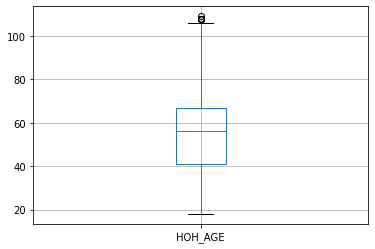

In [13]:
customer.boxplot(column=['HOH_AGE'])

There are outliers in the HOH_AGE column. Therefore, we decided to use median to replace NA values. The outliers could affect our future analysis if we use mean to replace NA values.

<AxesSubplot:>

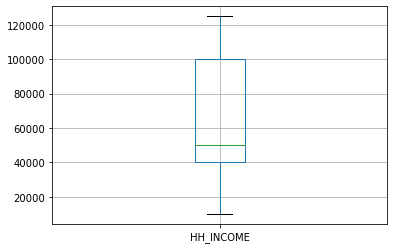

In [14]:
customer.boxplot(column=['HH_INCOME'])

There are no outliers in the HH_INCOME column. Therefore, we decided to use mean to replace NA values.

<AxesSubplot:>

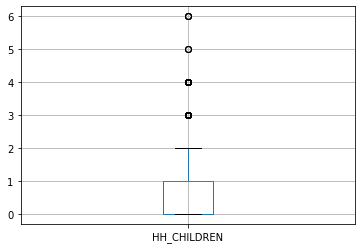

In [15]:
customer.boxplot(column=['HH_CHILDREN'])

There are outliers in the HH_CHILDREN column. Therefore, we decided to use median to replace NA values. The outliers could affect our future analysis if we use mean to replace NA values.

In [16]:
customerWithNA['HOH_AGE'].fillna(value=customerWithNA['HOH_AGE'].median(), inplace=True)
customerWithNA['HH_INCOME'].fillna(value=round(customerWithNA['HH_INCOME'].mean(),2), inplace=True)
customerWithNA['HH_CHILDREN'].fillna(value=customerWithNA['HH_CHILDREN'].median(), inplace=True)

In [17]:
customerWithNA

,CUSTOMER_ID,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN
0,2767,2767,106.0,100000.00,0.0
1,4111,4111,58.0,30000.00,1.0
2,655,655,67.0,66348.11,1.0
3,1999,1999,56.0,66348.11,1.0
4,1423,1423,79.0,30000.00,1.0
...,...,...,...,...,...
7043,2065,2065,35.0,10000.00,2.0
7044,4753,1187,50.0,30000.00,1.0
7045,5905,3514,57.0,40000.00,0.0
7046,5713,1114,62.0,30000.00,2.0


In [18]:
customerWithNA.to_csv('Wegmans Customer Data with NA Replaced.csv', index=False)

### Item Dataset

In [19]:
item

,ITEM_NBR,ITEM_DESCRIPTION,PRODUCT_HIERARCHY,DEPARTMENT_NAME,CATEGORY_NAME,CLASS_NAME,IS_ORGANIC,IS_FAMILYPACK,IS_WEGMANSBRAND
0,332005,ARR-CENTERPIECE W 3 CANDL 1 EA,42-60-02,FLORAL,ARRANGEMENTS,FOAM ARRANGEMENTS,0,0,1
1,424488,"Scunci U Got This Upzing, Double Combs 1 EA",18-13-25,HEALTH & BEAUTY CARE,HAIR ACCESSORIES,FASHION ACCESSORIES,0,0,0
2,213936,Signature Bouquet 1 EA,42-30-01,FLORAL,BOUQUETS,FRESH BOUQUETS,0,0,1
3,336252,"Yoplait Original Yogurt, Low Fat, Harvest Peac...",40-10-30,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,0
4,596609,papyTissue 8 CT,45-20-40,CARD DEPARTMENT,CARD SHOP GIFT WRAP,TISSUE PAPER,0,0,0
...,...,...,...,...,...,...,...,...,...
87248,37028,"Wegmans Cheese, Sharp Cheddar, Shredded, FAMI...",02-17-10,DAIRY,SHREDDED CHEESE,TRADITIONAL SHREDDED CHEESE,0,1,1
87249,2816,Altman's Lunch Herring 13 OZ,02-70-02,DAIRY,KOSHER DAIRY,HERRING/SEAFOOD,0,0,0
87250,28954,"Organic Cherry Tomato 4"" 1 EA",03-01-18,PRODUCE,WEGMANS ORGANIC FARM,WOF LIVE PLANTS,1,0,1
87251,16411,"Wegmans Organic Spinach & Spring Mix, FAMILY P...",03-13-42,PRODUCE,SALADS AND SALAD KITS,ORG SALAD BLENDS,1,1,1


#### Things to do:
- Examine the data types
- Identify any columns with NA values

There weren't any NA values. This dataset is good to go!

In [20]:
item.dtypes

ITEM_NBR              int64
ITEM_DESCRIPTION     object
PRODUCT_HIERARCHY    object
DEPARTMENT_NAME      object
CATEGORY_NAME        object
CLASS_NAME           object
IS_ORGANIC            int64
IS_FAMILYPACK         int64
IS_WEGMANSBRAND       int64
dtype: object

In [21]:
print(" \nCount total NaN at each column in Item dataset: \n",
      item.isnull().sum())

 
Count total NaN at each column in Item dataset: 
 ITEM_NBR             0
ITEM_DESCRIPTION     0
PRODUCT_HIERARCHY    0
DEPARTMENT_NAME      0
CATEGORY_NAME        0
CLASS_NAME           0
IS_ORGANIC           0
IS_FAMILYPACK        0
IS_WEGMANSBRAND      0
dtype: int64


### Sales + Location Dataset

In [22]:
sales

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES
0,-3159569380792161759,7/21/19,96,45177,1,0.0,0.24
1,-3159569380792161759,7/21/19,96,607378,1,0.0,0.86
2,8384649611398879621,1/20/19,590,36353,1,0.0,7.19
3,2162207011784361973,11/7/19,1807,12663,1,0.0,1.43
4,121169808038836155,3/20/19,1832,125639,1,0.0,0.71
...,...,...,...,...,...,...,...
1048570,-3294459774902307625,10/16/20,6682,43637,1,0.0,1.43
1048571,778889545366320440,12/8/20,3885,814129,1,0.0,0.66
1048572,8853076735561580105,5/1/19,2448,580573,1,0.0,4.31
1048573,-963755514588828062,5/1/20,696,10259,1,0.0,2.15


In [23]:
location

,TRANSACTION_KEY,LOCATION_NBR,INSTACART_IND
0,2690500712181362657,22,1
1,-8773936045043192608,63,1
2,-3661439005258676194,24,1
3,-4733295291706551970,25,1
4,6272747967003556830,20,1
...,...,...,...
441375,-1749134637415514696,24,0
441376,4577840945846652328,25,0
441377,-5971732586820603428,24,0
441378,3009082540181272219,24,0


#### Things to do:
- Examine the data types
- Identify any columns with NA values
- Merge location and sales datasets by TRANSACTION_KEY

There weren't any NA values in this dataset. All we had to do was merging location and sales dataset on TRANSACTION_KEY column.

In [24]:
sales.dtypes

TRANSACTION_KEY      int64
DATE_KEY            object
CUSTOMER_ID          int64
ITEM_NBR             int64
UNITS                int64
WEIGHT             float64
SALES              float64
dtype: object

In [25]:
location.dtypes

TRANSACTION_KEY    int64
LOCATION_NBR       int64
INSTACART_IND      int64
dtype: object

In [26]:
print(" \nCount total NaN at each column in Sales dataset: \n",
      sales.isnull().sum())
print(" \nCount total NaN at each column in Location dataset: \n",
      location.isnull().sum())

 
Count total NaN at each column in Sales dataset: 
 TRANSACTION_KEY    0
DATE_KEY           0
CUSTOMER_ID        0
ITEM_NBR           0
UNITS              0
WEIGHT             0
SALES              0
dtype: int64
 
Count total NaN at each column in Location dataset: 
 TRANSACTION_KEY    0
LOCATION_NBR       0
INSTACART_IND      0
dtype: int64


In [27]:
salesLocation = pd.merge(sales, location, on="TRANSACTION_KEY")
salesLocation

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND
0,-3159569380792161759,7/21/19,96,45177,1,0.0,0.24,68,0
1,-3159569380792161759,7/21/19,96,607378,1,0.0,0.86,68,0
2,-3159569380792161759,7/21/19,96,124363,1,0.0,1.29,68,0
3,-3159569380792161759,7/21/19,96,616770,1,0.0,2.87,68,0
4,-3159569380792161759,7/21/19,96,172983,1,0.0,2.15,68,0
...,...,...,...,...,...,...,...,...,...
1048570,-445987964229448009,12/9/19,4066,629915,1,0.0,3.59,3,0
1048571,7453292585493501463,10/3/19,2187,44554,1,0.0,0.93,22,0
1048572,-343820635285372653,10/22/20,481,92239,1,0.0,1.79,13,0
1048573,4437606063527501392,10/8/19,155,410339,0,0.0,0.00,63,0


In [28]:
sales.to_csv('Wegmans Sales Location.csv', index=False)

### Merging Data

#### Things to do:
- Merge Sales Location Dataset with Item Dataset on ITEM_NBR into salesItem Dataset
    - Wegmans Sales Item.csv
- Merge Sales Location Dataset with Customer Dataset on CUSTOMER_ID into salesCustomers (without NA values) and salesCustomersFull (with NA values)
    - Wegmans Sales Customer.csv
    - Wegmans Sales Customer Full.csv
- Merge salesItem Dataset with salesCustomers (without NA values) and salesCustomersFull (with NA values) into allData (without customer NA values) and allDataFull (with customer NA values)
    - Wegmans All Data.csv
    - Wegmans All Data Full.csv

In [29]:
salesItem = pd.merge(salesLocation, item, on="ITEM_NBR")
salesItem

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND,ITEM_DESCRIPTION,PRODUCT_HIERARCHY,DEPARTMENT_NAME,CATEGORY_NAME,CLASS_NAME,IS_ORGANIC,IS_FAMILYPACK,IS_WEGMANSBRAND
0,-3159569380792161759,7/21/19,96,45177,1,0.0,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",40-10-30,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1
1,2964557372677007630,7/29/20,1737,45177,2,0.0,0.48,24,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",40-10-30,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1
2,-8818458431181685485,12/8/19,2745,45177,2,0.0,0.48,24,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",40-10-30,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1
3,4948623861203185012,3/9/19,3963,45177,2,0.0,0.48,74,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",40-10-30,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1
4,-347535057361443400,10/17/20,188,45177,1,0.0,0.24,11,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",40-10-30,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,937954173833287248,7/10/19,2522,752946,1,0.0,13.67,18,0,SINGLECUT Softly Spoken Magic Spells 4/16 oz...,51-40-10,BEER & WINE COOLERS,CRAFT BEER,CRAFT 6 PACKS,0,0,0
1048571,544224609312636175,6/7/19,3471,566437,1,0.0,5.72,22,0,Papyrus greeting Card* 1 EA,45-10-15,CARD DEPARTMENT,GREETING CARDS,EVERYDAY CARDS: ALTERNT VENDOR,0,0,0
1048572,-5585646561555871484,3/10/20,6661,801183,3,0.0,8.62,3,0,"26"" Grn Ball Flower Stem 1 EA",82-05-06,GM SEASONAL MERCHANDISE,SEASONAL & HOLIDAY DECORATIONS,SPRING FLORAL DECOR,0,0,0
1048573,-316537679601839658,8/23/20,3239,762840,1,0.0,4.31,24,0,Wind Up Diver Toy 1 EA,10-90-08,GM BASIC PRODUCTS DEPARTMENT,TOYS & GAMES,TOYSMITH TOYS,0,0,0


In [30]:
salesItem.to_csv('Wegmans Sales Item.csv', index=False)

In [31]:
salesCustomers = pd.merge(salesLocation, customerWithoutNA, on="CUSTOMER_ID")
salesCustomers

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN
0,-3159569380792161759,7/21/19,96,45177,1,0.0,0.24,68,0,96,67.0,75000.0,0.0
1,-3159569380792161759,7/21/19,96,607378,1,0.0,0.86,68,0,96,67.0,75000.0,0.0
2,-3159569380792161759,7/21/19,96,124363,1,0.0,1.29,68,0,96,67.0,75000.0,0.0
3,-3159569380792161759,7/21/19,96,616770,1,0.0,2.87,68,0,96,67.0,75000.0,0.0
4,-3159569380792161759,7/21/19,96,172983,1,0.0,2.15,68,0,96,67.0,75000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994937,-5025129088482420806,12/23/20,5568,781876,0,0.0,1.08,67,0,1467,38.0,50000.0,0.0
994938,8365859189097857006,6/21/19,3252,508571,1,0.0,2.51,64,0,3252,71.0,75000.0,0.0
994939,5015039875098906343,3/3/20,5633,390234,1,0.0,9.35,65,1,2336,29.0,75000.0,2.0
994940,5015039875098906343,3/3/20,5633,68773,1,0.0,1.79,65,1,2336,29.0,75000.0,2.0


In [32]:
salesCustomers.to_csv('Wegmans Sales Customer.csv', index=False)

In [33]:
salesCustomersFull = pd.merge(salesLocation, customerWithNA, on="CUSTOMER_ID")
salesCustomersFull

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN
0,-3159569380792161759,7/21/19,96,45177,1,0.0,0.24,68,0,96,67.0,75000.00,0.0
1,-3159569380792161759,7/21/19,96,607378,1,0.0,0.86,68,0,96,67.0,75000.00,0.0
2,-3159569380792161759,7/21/19,96,124363,1,0.0,1.29,68,0,96,67.0,75000.00,0.0
3,-3159569380792161759,7/21/19,96,616770,1,0.0,2.87,68,0,96,67.0,75000.00,0.0
4,-3159569380792161759,7/21/19,96,172983,1,0.0,2.15,68,0,96,67.0,75000.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5015039875098906343,3/3/20,5633,390234,1,0.0,9.35,65,1,2336,29.0,75000.00,2.0
1048571,5015039875098906343,3/3/20,5633,68773,1,0.0,1.79,65,1,2336,29.0,75000.00,2.0
1048572,-3802740645276376728,3/2/20,5633,559644,1,0.0,6.47,65,1,2336,29.0,75000.00,2.0
1048573,8063107500341945991,11/6/19,364,540220,1,0.0,1.80,66,0,364,71.0,66348.11,1.0


In [34]:
salesCustomersFull.to_csv('Wegmans Sales Customer Full.csv', index=False)

In [35]:
allData = pd.merge(salesItem, customerWithoutNA, on="CUSTOMER_ID")
allData

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND,ITEM_DESCRIPTION,...,DEPARTMENT_NAME,CATEGORY_NAME,CLASS_NAME,IS_ORGANIC,IS_FAMILYPACK,IS_WEGMANSBRAND,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN
0,-3159569380792161759,7/21/19,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.0,0.0
1,8106217537813291443,7/28/19,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.0,0.0
2,4744706893461331626,3/22/20,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.0,0.0
3,8647152740526880532,3/3/19,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.0,0.0
4,-6081800986339541485,1/20/19,96,45177,1,0.00,0.36,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994937,-835397730634370950,2/14/19,6594,509063,1,0.00,18.00,3,0,Valentine's Day Signature Bouquet 1 EA,...,FLORAL,BOUQUETS,FRESH BOUQUETS,0,0,1,1505,39.0,75000.0,1.0
994938,7817171004940613028,8/8/19,6375,596801,-1,0.00,-2.58,3,0,"U Create Construction Paper, Assorted Colors ...",...,GM BASIC PRODUCTS DEPARTMENT,CRAFT SUPPLIES,ART PAPER,0,0,0,2051,34.0,20000.0,1.0
994939,1609074110777367327,11/30/19,5804,794857,1,0.33,1.43,11,0,JV MC Coffee Beans 1 LB,...,BULK FOODS,CHOCOLATES,UNWRAPPED CHOCOLATES,0,0,1,2219,58.0,100000.0,0.0
994940,-6261128042583831545,1/7/19,6270,704418,1,0.00,0.36,12,0,Tartan lunch napkin 16 CT,...,GM SEASONAL MERCHANDISE,SEASONAL &HOLIDAY PARTY SUPPLY,PARTY SUPPLIES: CHRISTMAS,0,0,0,3248,73.0,50000.0,1.0


In [36]:
allData.to_csv('Wegmans All Data.csv', index=False)

In [37]:
allDataFull = pd.merge(salesItem, customerWithNA, on="CUSTOMER_ID")
allDataFull

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND,ITEM_DESCRIPTION,...,DEPARTMENT_NAME,CATEGORY_NAME,CLASS_NAME,IS_ORGANIC,IS_FAMILYPACK,IS_WEGMANSBRAND,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN
0,-3159569380792161759,7/21/19,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.00,0.0
1,8106217537813291443,7/28/19,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.00,0.0
2,4744706893461331626,3/22/20,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.00,0.0
3,8647152740526880532,3/3/19,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.00,0.0
4,-6081800986339541485,1/20/19,96,45177,1,0.00,0.36,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,7817171004940613028,8/8/19,6375,596801,-1,0.00,-2.58,3,0,"U Create Construction Paper, Assorted Colors ...",...,GM BASIC PRODUCTS DEPARTMENT,CRAFT SUPPLIES,ART PAPER,0,0,0,2051,34.0,20000.00,1.0
1048571,1609074110777367327,11/30/19,5804,794857,1,0.33,1.43,11,0,JV MC Coffee Beans 1 LB,...,BULK FOODS,CHOCOLATES,UNWRAPPED CHOCOLATES,0,0,1,2219,58.0,100000.00,0.0
1048572,-6261128042583831545,1/7/19,6270,704418,1,0.00,0.36,12,0,Tartan lunch napkin 16 CT,...,GM SEASONAL MERCHANDISE,SEASONAL &HOLIDAY PARTY SUPPLY,PARTY SUPPLIES: CHRISTMAS,0,0,0,3248,73.0,50000.00,1.0
1048573,-5532141964044281705,2/16/19,4549,749141,1,0.00,6.83,68,0,Blue Point Brewing Company Citrus Plunge IPA ...,...,BEER & WINE COOLERS,CRAFT BEER,CRAFT 6 PACKS,0,0,0,3316,63.0,125000.00,1.0


In [38]:
allDataFull.to_csv('Wegmans All Data Full.csv', index=False)

### Cleaning the Wegmans All Data Full Dataset
#### Things to do:
Using allDataFull Dataset
- Delete all January 2021 items (~2.4k rows)
    - They were making YOY analyses look skewed - didn’t add much w/ 2 days
- Delete all discontinued items (~4.5k rows)
    - If available in 2019, but not 2020, we can’t see behavior changes
- Delete all negative units, weights and sales (~700 rows)
    - Skewing pricing analysis
- Create price per unit variable - this is done on Excel
    - Allows us to see price / item rather than just sales in total which aren't consistent based on units / weight


In [39]:
allDataFull_Clean = allDataFull.copy()

In [40]:
allDataFull_Clean.drop(allDataFull_Clean[allDataFull_Clean['SALES'] < 0].index, inplace = True)

In [41]:
allDataFull_Clean.drop(allDataFull_Clean[allDataFull_Clean['DATE_KEY'].str.contains('21$')==True].index, inplace = True)

In [42]:
allDataFull_Clean.drop(allDataFull_Clean[allDataFull_Clean['ITEM_DESCRIPTION'].str.contains('^[zZ][zZ].*')==True].index, inplace = True)

In [43]:
allDataFull_Clean.to_csv('Wegmans All Clean Data.csv', index=False)

### Explanatory Data Analysis

In [44]:
wegmansData = mydir + 'Wegmans All Clean Data.csv'
wegmansAll = pd.read_csv(wegmansData)

In [45]:
wegmansAll

,TRANSACTION_KEY,DATE_KEY,CUSTOMER_ID,ITEM_NBR,UNITS,WEIGHT,SALES,LOCATION_NBR,INSTACART_IND,ITEM_DESCRIPTION,...,DEPARTMENT_NAME,CATEGORY_NAME,CLASS_NAME,IS_ORGANIC,IS_FAMILYPACK,IS_WEGMANSBRAND,HOUSEHOLD_ID,HOH_AGE,HH_INCOME,HH_CHILDREN
0,-3159569380792161759,7/21/19,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.00,0.0
1,8106217537813291443,7/28/19,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.00,0.0
2,4744706893461331626,3/22/20,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.00,0.0
3,8647152740526880532,3/3/19,96,45177,1,0.00,0.24,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.00,0.0
4,-6081800986339541485,1/20/19,96,45177,1,0.00,0.36,68,0,"Wegmans Lowfat Blended Yogurt, Lemon 6 OZ",...,CULTURED DAIRY,YOGURT,BLENDED YOGURT,0,0,1,96,67.0,75000.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037402,-835397730634370950,2/14/19,6594,509063,1,0.00,18.00,3,0,Valentine's Day Signature Bouquet 1 EA,...,FLORAL,BOUQUETS,FRESH BOUQUETS,0,0,1,1505,39.0,75000.00,1.0
1037403,1609074110777367327,11/30/19,5804,794857,1,0.33,1.43,11,0,JV MC Coffee Beans 1 LB,...,BULK FOODS,CHOCOLATES,UNWRAPPED CHOCOLATES,0,0,1,2219,58.0,100000.00,0.0
1037404,-6261128042583831545,1/7/19,6270,704418,1,0.00,0.36,12,0,Tartan lunch napkin 16 CT,...,GM SEASONAL MERCHANDISE,SEASONAL &HOLIDAY PARTY SUPPLY,PARTY SUPPLIES: CHRISTMAS,0,0,0,3248,73.0,50000.00,1.0
1037405,-5532141964044281705,2/16/19,4549,749141,1,0.00,6.83,68,0,Blue Point Brewing Company Citrus Plunge IPA ...,...,BEER & WINE COOLERS,CRAFT BEER,CRAFT 6 PACKS,0,0,0,3316,63.0,125000.00,1.0


### Customer Dataset EDA

These are just general idea of our Wegmans data customers' demographic.

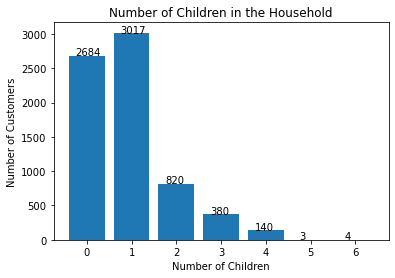

38.08% of the customers have 0 children.
42.81% of the customers have 1 child.
11.63% of the customers have 2 children.
5.39% of the customers have 3 children.
1.99% of the customers have 4 children.
0.04% of the customers have 5 children.
0.06% of the customers have 6 children.


In [84]:
x_children = customerWithNA['HH_CHILDREN'].value_counts().index
y_children = customerWithNA['HH_CHILDREN'].value_counts()

plt.bar(x_children,y_children)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text((i-.25),y[i],y[i])
        
addlabels(x_children, y_children)

plt.title("Number of Children in the Household")

plt.xlabel("Number of Children")
plt.ylabel("Number of Customers")

plt.show()

print(str((round(np.choose(0,y_children)/len(customerWithNA)*100,2))) + '% of the customers have 0 children.')
print(str((round(np.choose(1,y_children)/len(customerWithNA)*100,2))) + '% of the customers have 1 child.')
print(str((round(np.choose(2,y_children)/len(customerWithNA)*100,2))) + '% of the customers have 2 children.')
print(str((round(np.choose(3,y_children)/len(customerWithNA)*100,2))) + '% of the customers have 3 children.')
print(str((round(np.choose(4,y_children)/len(customerWithNA)*100,2))) + '% of the customers have 4 children.')
print(str((round(np.choose(5,y_children)/len(customerWithNA)*100,2))) + '% of the customers have 5 children.')
print(str((round(np.choose(6,y_children)/len(customerWithNA)*100,2))) + '% of the customers have 6 children.')

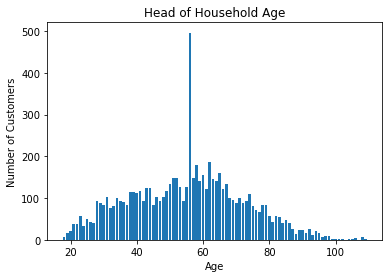

The majority of the customers' head of household age is around 60 years old. There seems to be a normal distribution.


In [92]:
x_age = customerWithNA['HOH_AGE'].value_counts().index
y_age = customerWithNA['HOH_AGE'].value_counts()

plt.bar(x_age,y_age)

plt.title("Head of Household Age")

plt.xlabel("Age")
plt.ylabel("Number of Customers")

plt.show()

print("The majority of the customers' head of household age is around 60 years old. " + 
      "There seems to be a normal distribution.")

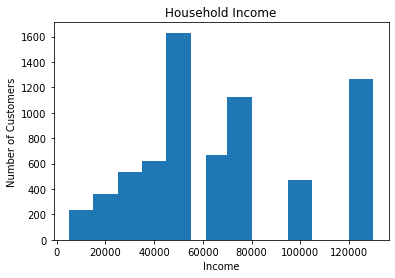

The majority of the customers' household income is in the $50,000 to $75,000 range.
This dataset includes the mean household income of $66,348.11, which was used to replace the NA values.


In [94]:
x_income = customerWithNA['HH_INCOME'].value_counts().index
y_income = customerWithNA['HH_INCOME'].value_counts()

plt.bar(x_income,y_income,10000)

plt.title("Household Income")

plt.xlabel("Income")
plt.ylabel("Number of Customers")

plt.show()

print("The majority of the customers' household income is in the $50,000 to $75,000 range.")
print("This dataset includes the mean household income of $66,348.11, which was used to replace the NA values.")

### Item Dataset EDA

These are just general idea of what Wegmans item we are working with.

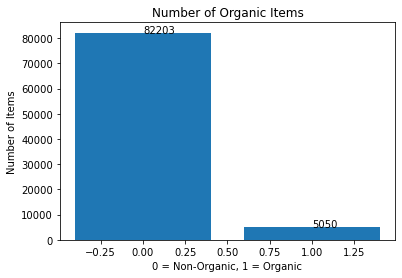

94.21% of the transactions are non-organic.
5.79% of the transactions are organic.


In [105]:
x_organic = item['IS_ORGANIC'].value_counts().index
y_organic = item['IS_ORGANIC'].value_counts()

plt.bar(x_organic,y_organic)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
addlabels(x_organic, y_organic)

plt.title("Number of Organic Items")

plt.xlabel("0 = Non-Organic, 1 = Organic")
plt.ylabel("Number of Items")

plt.show()

print(str((round(np.choose(0,y_organic)/len(item)*100,2))) + '% of the transactions are non-organic.')
print(str((round(np.choose(1,y_organic)/len(item)*100,2))) + '% of the transactions are organic.')

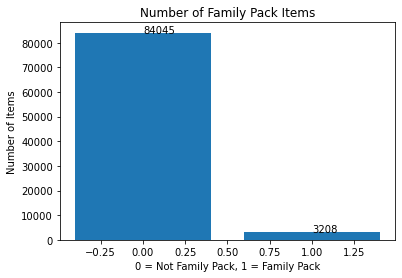

96.32% of the transactions are not family pack.
3.68% of the transactions are family pack.


In [104]:
x_familypack = item['IS_FAMILYPACK'].value_counts().index
y_familypack = item['IS_FAMILYPACK'].value_counts()

plt.bar(x_familypack,y_familypack)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
addlabels(x_familypack, y_familypack)

plt.title("Number of Family Pack Items")

plt.xlabel("0 = Not Family Pack, 1 = Family Pack")
plt.ylabel("Number of Items")

plt.show()

print(str((round(np.choose(0,y_familypack)/len(item)*100,2))) + '% of the transactions are not family pack.')
print(str((round(np.choose(1,y_familypack)/len(item)*100,2))) + '% of the transactions are family pack.')

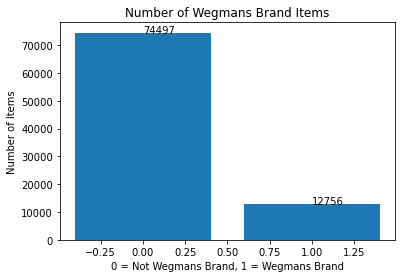

85.38% of the transactions are not Wegmans brand.
14.62% of the transactions are Wegmans brand.


In [103]:
x_wegmansbrand = item['IS_WEGMANSBRAND'].value_counts().index
y_wegmansbrand = item['IS_WEGMANSBRAND'].value_counts()

plt.bar(x_wegmansbrand,y_wegmansbrand)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
addlabels(x_wegmansbrand, y_wegmansbrand)

plt.title("Number of Wegmans Brand Items")

plt.xlabel("0 = Not Wegmans Brand, 1 = Wegmans Brand")
plt.ylabel("Number of Items")

plt.show()

print(str((round(np.choose(0,y_wegmansbrand)/len(item)*100,2))) + '% of the transactions are not Wegmans brand.')
print(str((round(np.choose(1,y_wegmansbrand)/len(item)*100,2))) + '% of the transactions are Wegmans brand.')

### Sales Location Dataset EDA
These are just general idea of what Wegmans sales transactions we are working with.

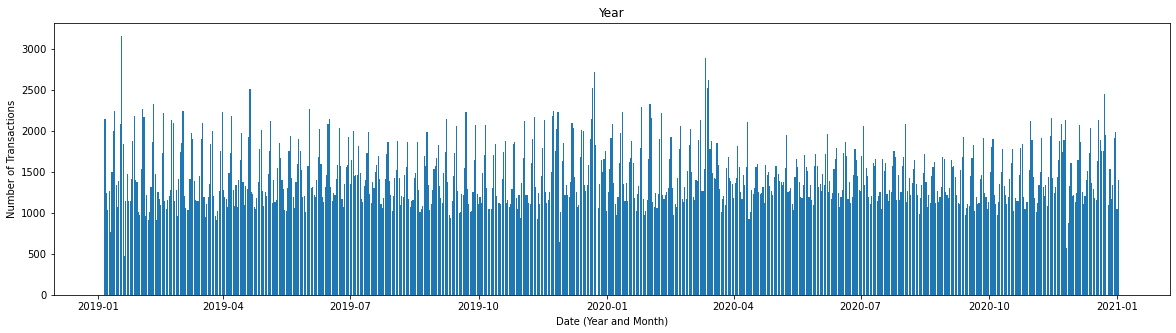

In [52]:
salesLocation["DATE_KEY"] =  pd.to_datetime(salesLocation["DATE_KEY"])
x_date = salesLocation['DATE_KEY'].value_counts().index
y_date = salesLocation['DATE_KEY'].value_counts()

plt.figure(figsize=(20, 5))
plt.bar(x_date,y_date)

plt.title("Year")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Number of Transactions")
plt.show()

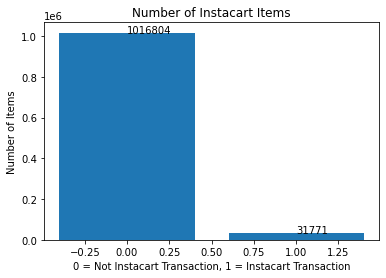

96.97% of the transactions are not Instacart Transaction.
3.03% of the transactions are Instacart Transaction.


In [102]:
x_instacart = salesLocation['INSTACART_IND'].value_counts().index
y_instacart = salesLocation['INSTACART_IND'].value_counts()

plt.bar(x_instacart,y_instacart)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
addlabels(x_instacart, y_instacart)

plt.title("Number of Instacart Items")

plt.xlabel("0 = Not Instacart Transaction, 1 = Instacart Transaction")
plt.ylabel("Number of Items")

plt.show()

print(str((round(np.choose(0,y_instacart)/len(salesLocation)*100,2))) + '% of the transactions are not Instacart Transaction.')
print(str((round(np.choose(1,y_instacart)/len(salesLocation)*100,2))) + '% of the transactions are Instacart Transaction.')

In [108]:
instacartTransactions = salesLocation[salesLocation['INSTACART_IND'] == 1]

In [111]:
notInstacartTransactions = salesLocation[salesLocation['INSTACART_IND'] == 0]

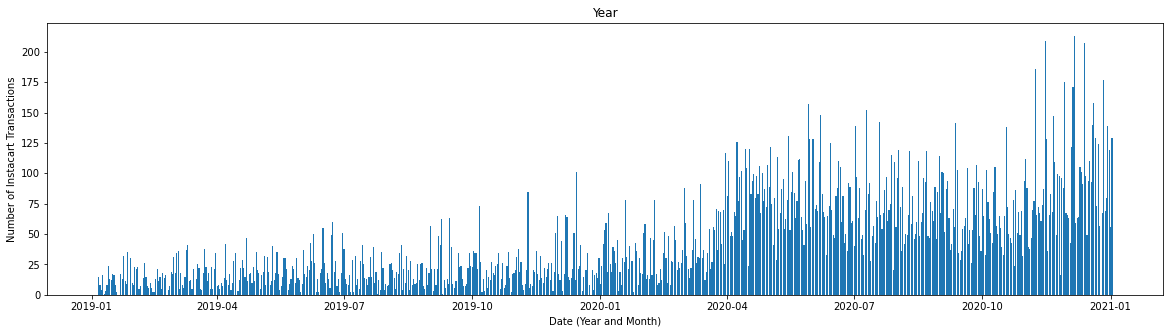

We can see that after March 2020, Instacart transactions went up significantly.


In [113]:
x_dateInsta = instacartTransactions['DATE_KEY'].value_counts().index
y_dateInsta = instacartTransactions['DATE_KEY'].value_counts()

plt.figure(figsize=(20, 5))
plt.bar(x_dateInsta,y_dateInsta)

plt.title("Year")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Number of Instacart Transactions")
plt.show()

print("We can see that after March 2020, Instacart transactions went up significantly.")

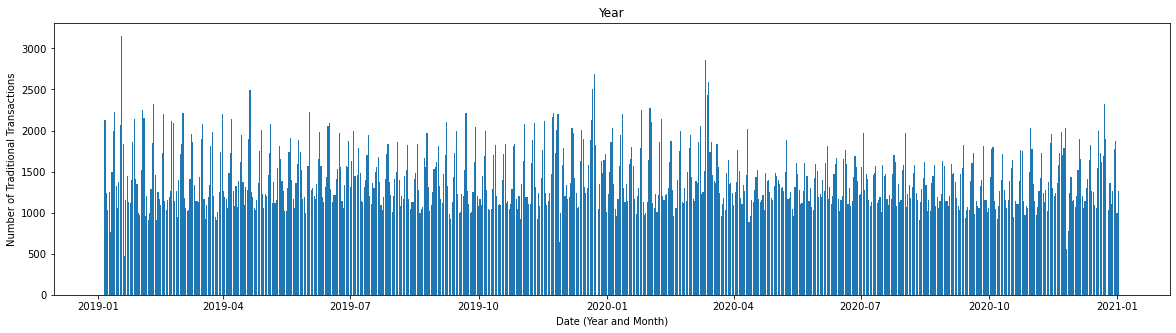

In [115]:
x_dateNotInsta = notInstacartTransactions['DATE_KEY'].value_counts().index
y_dateNotInsta = notInstacartTransactions['DATE_KEY'].value_counts()

plt.figure(figsize=(20, 5))
plt.bar(x_dateNotInsta,y_dateNotInsta)

plt.title("Year")

plt.xlabel("Date (Year and Month)")
plt.ylabel("Number of Traditional Transactions")
plt.show()

### Wegmans All Data Full Dataset EDA

In [117]:
wegmansAll.groupby([pd.to_datetime(wegmansAll["DATE_KEY"]).dt.year, 'IS_ORGANIC'])['DATE_KEY'].count().unstack()

IS_ORGANIC,0,1
DATE_KEY,,
2019,484912,29576
2020,492725,30194


In [55]:
wegmansAll.groupby([pd.to_datetime(wegmansAll["DATE_KEY"]).dt.year, 'IS_FAMILYPACK'])['DATE_KEY'].count().unstack()

IS_FAMILYPACK,0,1
DATE_KEY,,
2019,463610,50878
2020,470155,52764


In [56]:
wegmansAll.groupby([pd.to_datetime(wegmansAll["DATE_KEY"]).dt.year, 'IS_WEGMANSBRAND'])['DATE_KEY'].count().unstack()

IS_WEGMANSBRAND,0,1
DATE_KEY,,
2019,248843,265645
2020,250915,272004


In [57]:
department = wegmansAll.groupby(['DEPARTMENT_NAME', pd.to_datetime(wegmansAll["DATE_KEY"]).dt.year,
                    pd.to_datetime(wegmansAll["DATE_KEY"]).dt.quarter])['DATE_KEY'].count().unstack()

pd.set_option('display.max_rows', department.shape[0]+1)
print(department)

DATE_KEY                                     1        2        3        4
DEPARTMENT_NAME              DATE_KEY                                    
ASIAN                        2019        166.0    174.0    175.0    210.0
                             2020        155.0    141.0    240.0    247.0
BAKESHOP                     2019       3485.0   4088.0   4309.0   3884.0
                             2020       3908.0   4243.0   4109.0   3780.0
BEER & WINE COOLERS          2019        800.0   1109.0   1269.0   1024.0
                             2020        880.0   1270.0   1290.0   1158.0
BEVERAGE CONTAINER RETURNS   2019       3618.0   4315.0   4550.0   4287.0
                             2020       4026.0   4110.0   4609.0   4208.0
BULK FOODS                   2019       1058.0   1215.0    987.0   1078.0
                             2020        870.0    704.0    706.0    806.0
CARD DEPARTMENT              2019        799.0   1114.0    730.0    814.0
                             2020     

In [58]:
itemDesc = wegmansAll.groupby(['DEPARTMENT_NAME','ITEM_DESCRIPTION',
                               pd.to_datetime(wegmansAll["DATE_KEY"]).dt.year])[['DATE_KEY']].agg(['count'])
itemDesc = itemDesc.sort_values(by=['DEPARTMENT_NAME',('DATE_KEY','count')],ascending=[True,False])
itemDesc = itemDesc.groupby('DEPARTMENT_NAME').head(2)
print(itemDesc)

                                                                                         DATE_KEY
                                                                                            count
DEPARTMENT_NAME              ITEM_DESCRIPTION                                   DATE_KEY         
ASIAN                        Wegmans  Sesame Chicken with Vegetable Lo Mein ... 2019           96
                                                                                2020           90
BAKESHOP                     Wegmans  Giant Bread  22 OZ                        2019         1356
                                                                                2020         1333
BEER & WINE COOLERS          Genesee  Limited Edition Seasonal Beer  12/12 o... 2020          139
                                                                                2019          119
BEVERAGE CONTAINER RETURNS   Pop Deposit (.05) 1 EA                             2019         5574
                    

In [59]:
category = wegmansAll.groupby(['DEPARTMENT_NAME','CATEGORY_NAME',
                               pd.to_datetime(wegmansAll["DATE_KEY"]).dt.year])[['DATE_KEY']].agg(['count'])
category = category.sort_values(by=['DEPARTMENT_NAME',('DATE_KEY','count')],ascending=[True,False])
category = category.groupby('DEPARTMENT_NAME').head(2)
print(category)

                                                                     DATE_KEY
                                                                        count
DEPARTMENT_NAME              CATEGORY_NAME                  DATE_KEY         
ASIAN                        ASIAN PACKAGED                 2020          729
                                                            2019          645
BAKESHOP                     VARIETY BREADS                 2019         5403
                                                            2020         5340
BEER & WINE COOLERS          CRAFT BEER                     2020         1793
                                                            2019         1640
BEVERAGE CONTAINER RETURNS   BEVERAGE CONTAINER DEPOSITS    2020        16184
                                                            2019        15831
BULK FOODS                   CANDY                          2019         1057
                             BULK SNACK NUTS                2019

In [60]:
wegmansAll.groupby(['HH_INCOME', 'IS_ORGANIC'])['IS_ORGANIC'].count().unstack()

IS_ORGANIC,0,1
HH_INCOME,,
10000.00,28814,1342
15000.00,18453,1049
20000.00,47435,2362
30000.00,60216,3430
40000.00,87448,4619
50000.00,264786,14058
66348.11,11717,661
75000.00,168213,9967
100000.00,83456,4676


In [61]:
incomeOrganic = wegmansAll.groupby(['HH_INCOME', 'IS_ORGANIC']).agg({'IS_ORGANIC':'count'})
organicIncome = wegmansAll.groupby(['HH_INCOME']).agg({'IS_ORGANIC':'count'})
incomeOrganic.div(organicIncome, level = 'HH_INCOME') * 100

IS_ORGANIC
HH_INCOME IS_ORGANIC            
10000.00  0            95.549808
          1             4.450192
15000.00  0            94.621065
          1             5.378935
20000.00  0            95.256742
          1             4.743258
30000.00  0            94.610816
          1             5.389184
40000.00  0            94.983002
          1             5.016998
50000.00  0            94.958471
          1             5.041529
66348.11  0            94.659880
          1             5.340120
75000.00  0            94.406218
          1             5.593782
100000.00 0            94.694322
          1             5.305678
125000.00 0            92.164838
          1             7.835162

In general, the majority of the customers tend to buy more non-organic items than organic items. However, we would need to look more into specifically the 'grocery department' in the future as some other department might not have organic vs. non-organic options. Based on this general idea, we can see that the highest household income range has more percentage of organic items in their transactions.

In [62]:
incomeWegmansBrand = wegmansAll.groupby(['HH_INCOME', 'IS_WEGMANSBRAND']).agg({'IS_WEGMANSBRAND':'count'})
WegmansBrandIncome = wegmansAll.groupby(['HH_INCOME']).agg({'IS_WEGMANSBRAND':'count'})
incomeWegmansBrand.div(WegmansBrandIncome, level = 'HH_INCOME') * 100

IS_WEGMANSBRAND
HH_INCOME IS_WEGMANSBRAND                 
10000.00  0                      50.295132
          1                      49.704868
15000.00  0                      49.128295
          1                      50.871705
20000.00  0                      48.300098
          1                      51.699902
30000.00  0                      48.464947
          1                      51.535053
40000.00  0                      48.671076
          1                      51.328924
50000.00  0                      48.769204
          1                      51.230796
66348.11  0                      47.956051
          1                      52.043949
75000.00  0                      47.812886
          1                      52.187114
100000.00 0                      47.290428
          1                      52.709572
125000.00 0                      47.397699
          1                      52.602301

Generally, we can see that the lowest household income bracket shows that that household bought generally buys more non-Wegmans brand items than Wegmans brand. This is then flipped as the household income bracket increases. It seems that the $100,000 bracket tends to buy more Wegmans Brand products. However, we can see that the percentage of Wegmans Brand items that were purchased are similar across the household income ranges.

In [63]:
children = wegmansAll.groupby(['HH_CHILDREN', 'IS_FAMILYPACK']).agg({'IS_FAMILYPACK':'count'})
family = wegmansAll.groupby(['HH_CHILDREN']).agg({'IS_FAMILYPACK':'count'})
children.div(family, level = 'HH_CHILDREN') * 100

IS_FAMILYPACK
HH_CHILDREN IS_FAMILYPACK               
0.0         0                  90.459494
            1                   9.540506
1.0         0                  90.071704
            1                   9.928296
2.0         0                  89.337506
            1                  10.662494
3.0         0                  89.206401
            1                  10.793599
4.0         0                  88.726949
            1                  11.273051
5.0         0                  87.500000
            1                  12.500000
6.0         0                  93.360996
            1                   6.639004

Generally, we can see that the percentage of Family Pack transactions increases as number of children in the household increases.

### Future Analysis Ideas
- Run more time-series regression and compare the behavior between 2019 and 2020
- Look into more specific departments and item class/description
- Look more specifically into how choices of grocery shifted based on time
- Use Treemap package to visualize the product portfolio of the transactions in R